In [1]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
sys.path.insert(1, '/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/')

import relaxation_times as rt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/relaxation_times.py:155: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if line is "":


In [24]:

begin=0
end=32480000
RM_avail=False

atom1="C1"
atom2="H11"

atom1="C3"
atom2="H31"

moleculeType="Lipid"

In [ ]:
#eYqjD 50SDS
path="/media/nenciric/Ricky2022/morgan/1_eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC/"
grofile="5_eYqjD_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_110ns_mahti_20ns_mahti.gro"
xtcfile="6_eYqjD_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_110ns_mahti_20ns_mahti_3248ns.xtc"
tprfile="5_eYqjD_50SDS_micelle_310K_CHARMM_lastframe_FromSofia_SDS_Protein_SOD_solvated_OPC_local_run_20ps_mahti_110ns_mahti.tpr"


In [51]:
#hmff 60SDS
#path="/media/nenciric/Ricky2022/morgan/23_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC/"
#grofile="7-Ricky_hMff_60SDS.gro"
#xtcfile="7-Ricky_hMff_60SDS.xtc"
#tprfile="7-Ricky_hMff_60SDS.tpr"


#hMff 40SDS
#path="/media/nenciric/Ricky2022/morgan/22_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC/"
#grofile="10_Ricky_hMff_40SDS.gro"
#xtcfile="10_Ricky_hMff_40SDS.xtc"
#tprfile="10_Ricky_hMff_40SDS.tpr"

#hMff 45SDS
#path="/media/nenciric/Ricky2022/morgan/21_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC/"
#grofile="10_Ricky_hMff_45SDS.gro"
#xtcfile="10_Ricky_hMff_45SDS.xtc"
#tprfile="10_Ricky_hMff_45SDS.tpr"

#hMff 50SDS
path="/media/nenciric/Ricky2022/morgan/2_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC/"
grofile="10-Ricky_hMff_50SDS.gro"
xtcfile="10-Ricky_hMff_50SDS_no_PBC.xtc"
tprfile="10-Ricky_hMff_50SDS.tpr"


In [52]:
for atom1, atom2 in [("C1","H11"),("C3","H31")]:
    rt.CalculateCorrelationFunctions(path,begin,end,RM_avail,grofile,xtcfile,tprfile,atom1,atom2,moleculeType)

Number of corelation functions to calculate: 1 

Calculatin correlation function 1


                      :-) GROMACS - gmx rotacf, 2021.5 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

Number of corelation functions to calculate: 1 

Calculatin correlation function 1


                      :-) GROMACS - gmx rotacf, 2021.5 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mu

In [53]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field=850
#magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"



## eElab 31.5.22
folder_path="corr_func_0_32480_C1_H11/"
output_name="hMff_50SDS_micelle_SDS_relax_coef.out"
residues=2


author_name="Ricky Nencini"

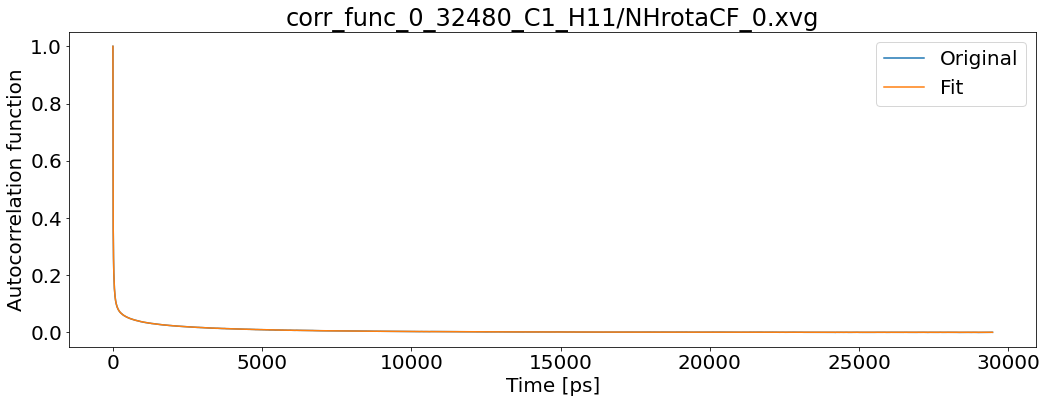

T1: 0.018157078470558703 T2: 0.01508136557712924 NOE: 0


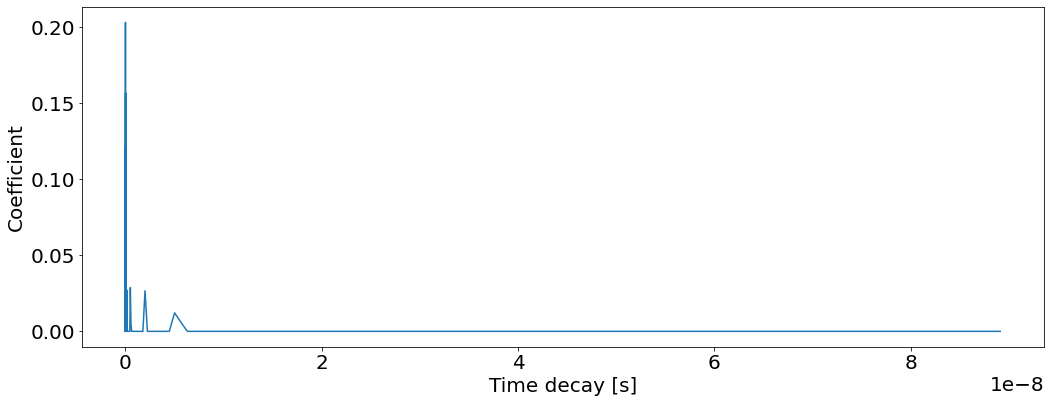

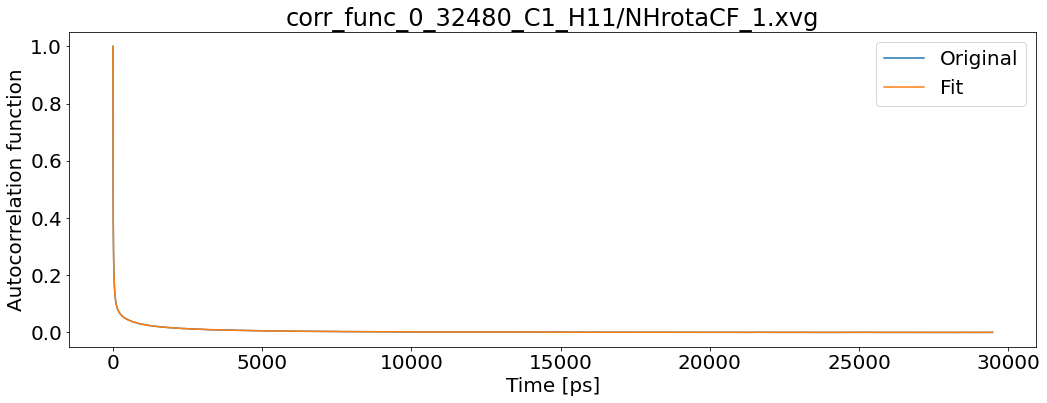

T1: 0.022605312551829446 T2: 0.019481458595531905 NOE: 0


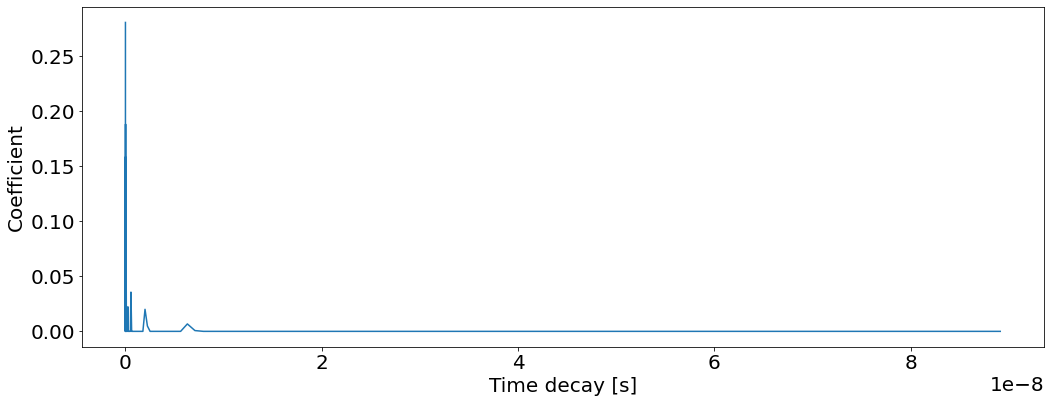

In [54]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
    
np.savetxt(output_name,Ctimes_to_save)

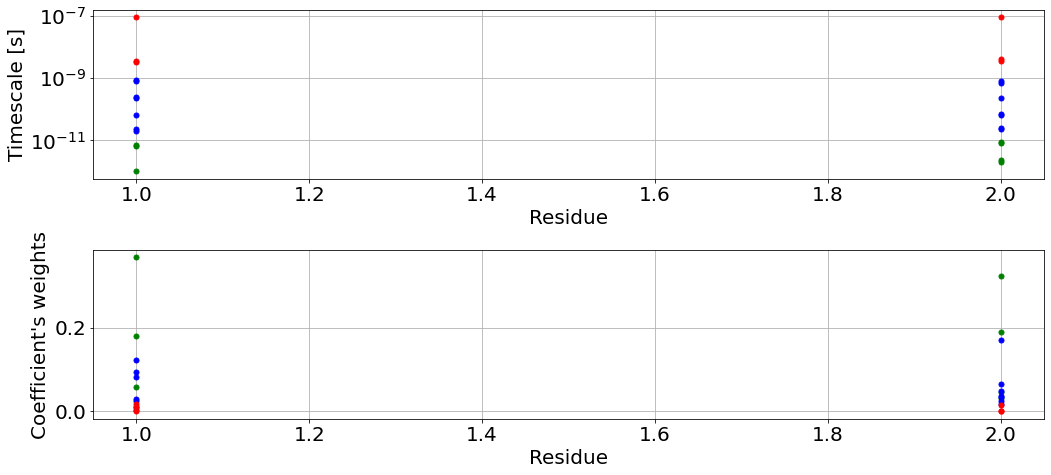

In [8]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(2)



ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Residue")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    

In [9]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field=850
#magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"



## eElab 31.5.22
folder_path="/home/nenciric/Documents/git/CorysPeptides/figure1/water_correlation_functions/OPC/"
output_name="60SDS_micelle_SDS_relax_alpha.out"
residues=2


author_name="Ricky Nencini"




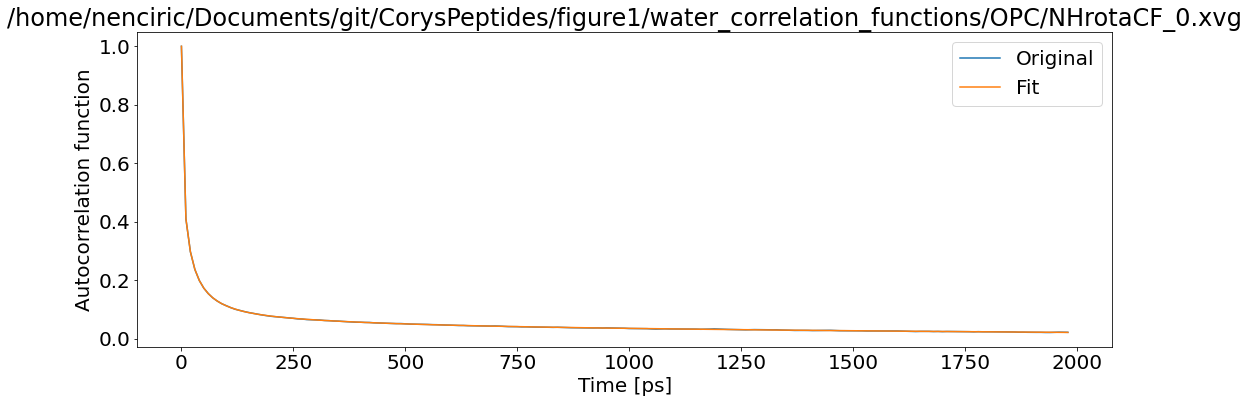

T1: 0.018862172103752264 T2: 0.01768723275803335 NOE: 0


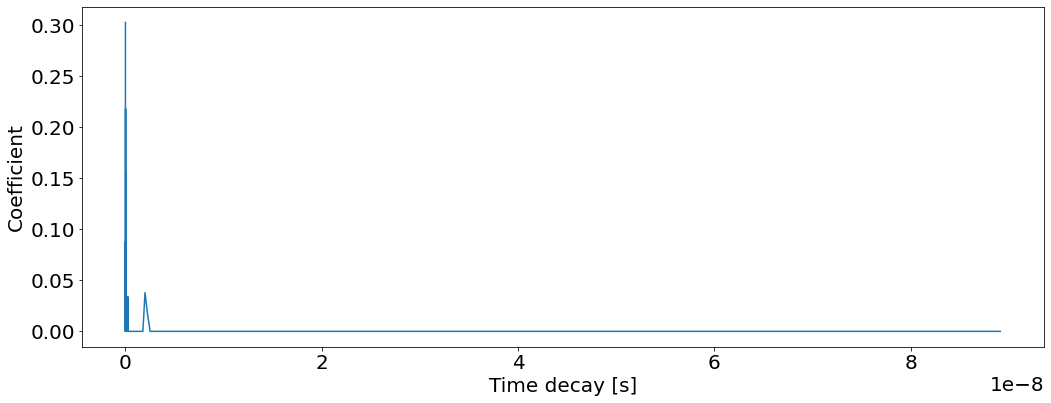

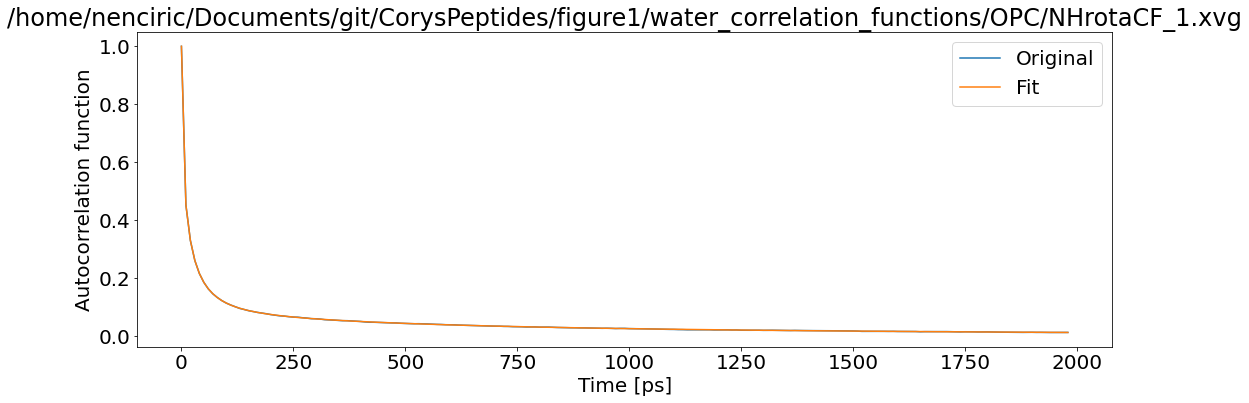

T1: 0.024312122146161606 T2: 0.023482040600615203 NOE: 0


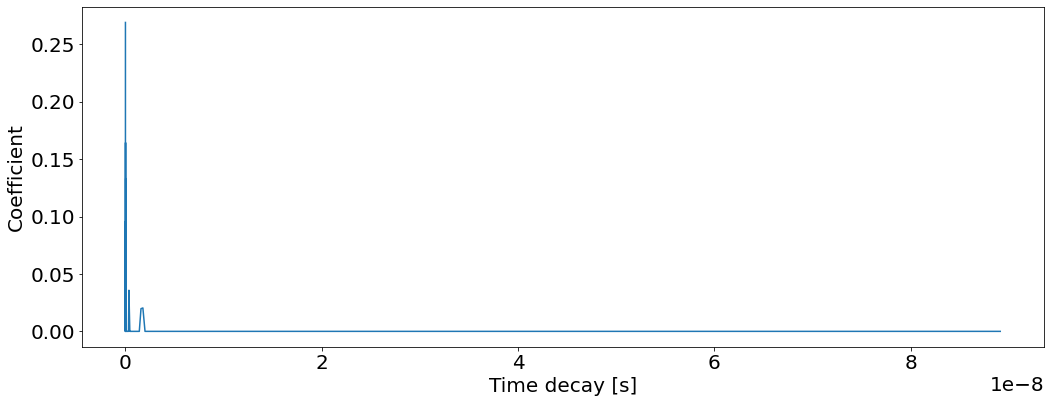

In [10]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)

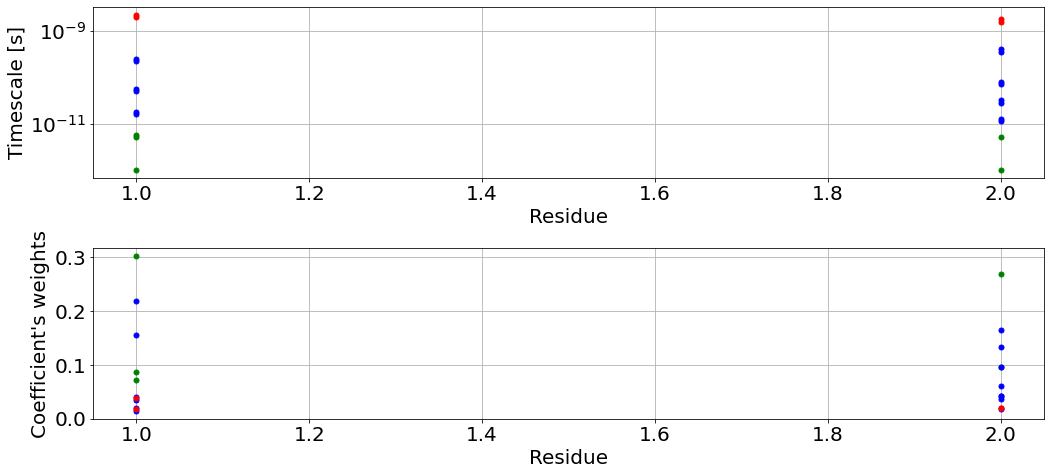

In [11]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(2)



ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Residue")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Residue")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    

In [16]:
np.savetxt("50SDS_eYqjD_relax_coef.out",Ctimes_to_save)

In [17]:
pwd

'/home/local/nenciric/Documents/git/CorysPeptides/calculate_relax_from_SDS_proteins'